In [99]:
from rl.markov_process import FiniteMarkovProcess, FiniteMarkovRewardProcess
from rl.distribution import Categorical, Constant
import matplotlib.pyplot as plt
import seaborn as sns

## 1., 2., 4. : Snake and Ladders

State space : $\mathcal{S}= \{0...100\}$, $\mathcal{T}= \{100\}$, transitions are uniform on the dice roll, with special cases when landing on a ladder, a snake or exceeding 100. When these special cases don't occur, $$P(s, s+k) = \frac{1}{6}, ~ \forall k \in [1..6]$$.

In [41]:
class SnakeAndLadders(FiniteMarkovProcess):
    #determines the post-snakeladder position when the dice gets you to position i
    def __init__(self):
        snake_ladders_map = {i:i for i in range(0, 101)}
        #ladders 
        snake_ladders_map[1] = 38
        snake_ladders_map[4] = 14
        snake_ladders_map[8] = 10
        snake_ladders_map[28] = 76
        snake_ladders_map[21] = 42
        snake_ladders_map[50] = 67
        snake_ladders_map[71] = 92
        snake_ladders_map[80] = 99
        #snakes
        snake_ladders_map[32] = 10
        snake_ladders_map[36] = 6
        snake_ladders_map[48] = 26
        snake_ladders_map[62] = 18
        snake_ladders_map[88] = 24
        snake_ladders_map[95] = 56
        snake_ladders_map[97] = 78
        transition_map = {}
        for i in range(100):
            distrib = {}
            for k in range(i+1, i+7):
                if k <= 100:
                    distrib[snake_ladders_map[k]] = 1/6 
                else:
                    #original rule : if you roll too much (position would be > 100), you still win the game
                    distrib[100] +=1/6
            transition_map[i] = Categorical(distrib)
        transition_map[100] = None
        super().__init__(transition_map)

#### Vizualising games

In [45]:
SnL = SnakeAndLadders()

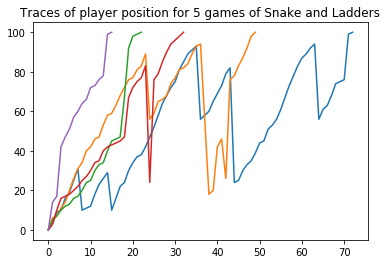

In [103]:
for i in range(5):
    trace = next(SnL.traces(Constant(0)))
    plt.plot([k for k in trace])
plt.title('Traces of player position for 5 games of Snake and Ladders')
plt.show() 

Distribution of rolls needed:

[]

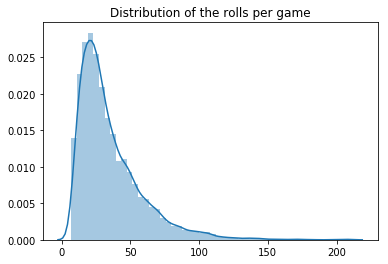

In [104]:
game_lengths = []
for i in range(10000):
    trace = next(SnL.traces(Constant(0)))
    game_lengths.append(len(list(trace)))

plt.title('Distribution of the rolls per game')
sns.distplot(game_lengths, bins = 50)
plt.plot()

# Reward process
As we want the expected number of rolls, they will constitute the reward. We will model the reward as $$P(s, 1, s') = 1, ~ \forall s,s' \in \mathcal{S}$$ and we will be looking at $V(0)$ with a discount factor $\gamma = 1$

Remark: this technique wouldn't be valid if there was a way to come back to position 0 after the start of the game

In [85]:
class SnakeAndLaddersReward(FiniteMarkovRewardProcess):
    def __init__(self):
        #determines the post-snakeladder position when the dice gets you to position i
        snake_ladders_map = {i:i for i in range(0, 101)} 
        #ladders 
        snake_ladders_map[1] = 38
        snake_ladders_map[4] = 14
        snake_ladders_map[8] = 10
        snake_ladders_map[28] = 76
        snake_ladders_map[21] = 42
        snake_ladders_map[50] = 67
        snake_ladders_map[71] = 92
        snake_ladders_map[80] = 99
        #snakes
        snake_ladders_map[32] = 10
        snake_ladders_map[36] = 6
        snake_ladders_map[48] = 26
        snake_ladders_map[62] = 18
        snake_ladders_map[88] = 24
        snake_ladders_map[95] = 56
        snake_ladders_map[97] = 78
        transition_map = {}
        for i in range(100):
            distrib = {}
            for k in range(i+1, i+7):
                if k <= 100:
                    distrib[(snake_ladders_map[k], 1.)] = 1/6 
                else:
                    #original rule : if you roll too much (position would be > 100), you still win the game
                    distrib[(100, 1.)] +=1/6
            transition_map[i] = Categorical(distrib)
        transition_map[100] = None
        super().__init__(transition_map)
    def display_expected_rolls(self):
        print(f'expected number of rolls: {self.get_value_function_vec(1)[0]:.2f}')

In [105]:
SnLR = SnakeAndLaddersReward()
SnLR.display_expected_rolls()

expected number of rolls: 34.04


## 3. Frog puzzle: number of leaps
We will model the frog puzle as a FiniteMarkovReward process with $\mathcal{S} = \{1...10\}$ (termination 10), reward constant equal to 1. The states will be the positions and the transition probabilities will be $$P(s, s') = \frac{1}{10-s} ~ \forall s < s' \leq 10$$

We will then get the value function for the sarting state (1) with $\gamma = 1$ to compute the number of leaps

In [106]:
class FrogPuzzle(FiniteMarkovRewardProcess):
    def __init__(self):
        transition_map = {}
        for i in range(1,10):
            transition_map[i] = Categorical({(k,1.): 1/(10-i) for k in range(i+1, 11)})
        transition_map[10] = None
        super().__init__(transition_map)
    def display_expected_leaps(self):
        print(f'expected number of leaps: {self.get_value_function_vec(1)[0]:.2f}')
frog = FrogPuzzle()
frog.display_expected_leaps()

expected number of leaps: 2.83


## 4. Stock Price extension
